# Examples of wavelet transforms

This notebook contains plots for a few simple time series showing them in the time (left), frequency (middle) and wavelet time-frequency (right) domains.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import WDM

from WDM.code.plotting.plotting import time_domain_plot, frequency_domain_plot, time_frequency_plot

In [3]:
dt = 1.0
N = 8192
Nf = 512

wdm = WDM.WDM.WDM_transform(dt=dt, Nf=Nf, N=N, q=8, calc_m0=True)
print(wdm)

WDM_transform(Nf=512, N=8192, q=8, d=4, A_frac=0.25, calc_m0=True)
self.Nt = 16 time cells
self.Nf = 512 frequency cells
self.dT = 512.0 time resolution
self.dF = 0.0009765625 frequency resolution
self.K = 8192 window length


Low frequency sine wave.

$$ x(t) = \sin(2\pi ft) $$

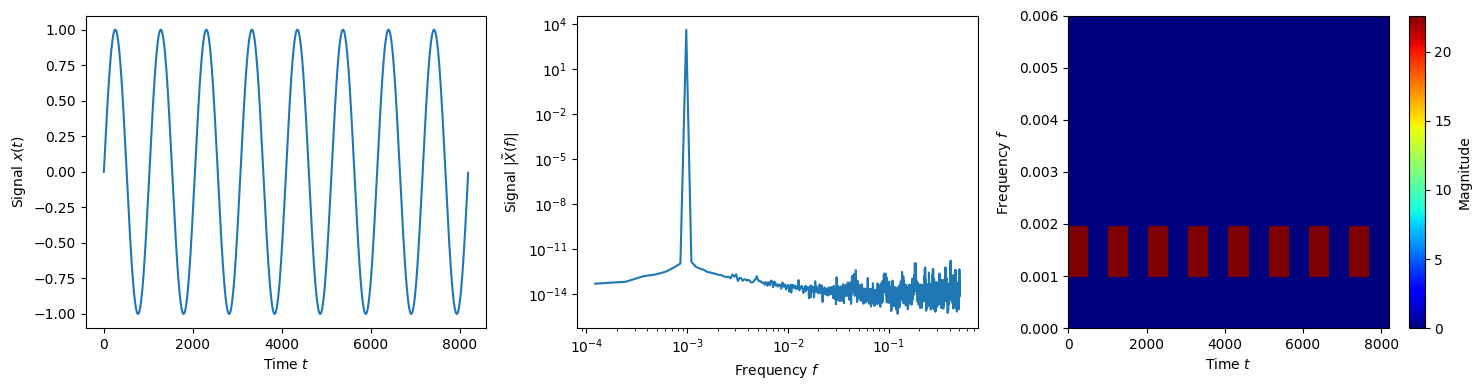

In [17]:
f = lambda t, T: np.sin(2*np.pi*t/T)

data = f(wdm.times, N/8)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')
axes[2].set_ylim(0, 0.006)

plt.tight_layout()
plt.show()

Low frequency cosine wave

$$ x(t) = \cos(2\pi ft) $$

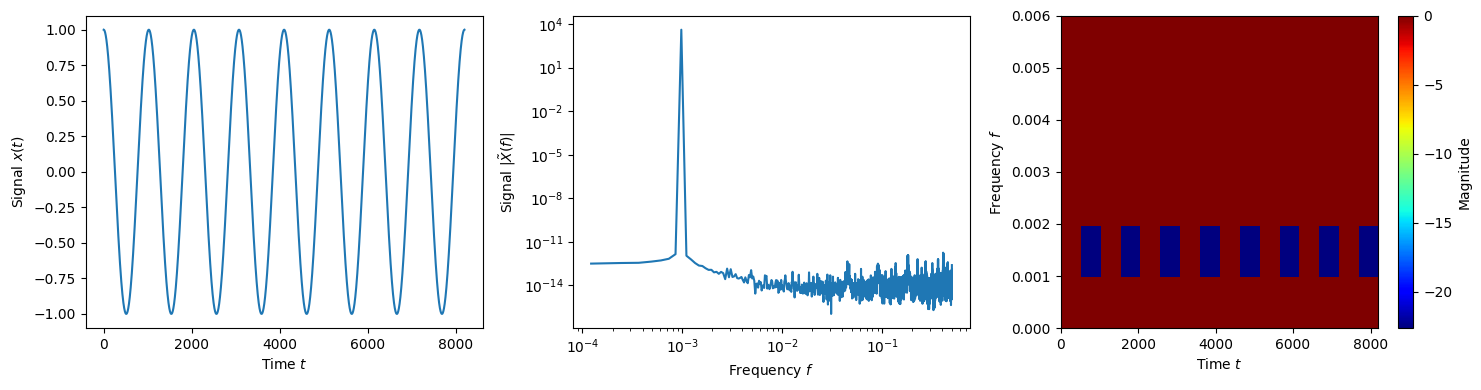

In [18]:
f = lambda t, T: np.cos(2*np.pi*t/T)

data = f(wdm.times, N/8)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')
axes[2].set_ylim(0, 0.006)

plt.tight_layout()
plt.show()

High frequency sine wave

$$ x(t) = \sin(2\pi ft) $$

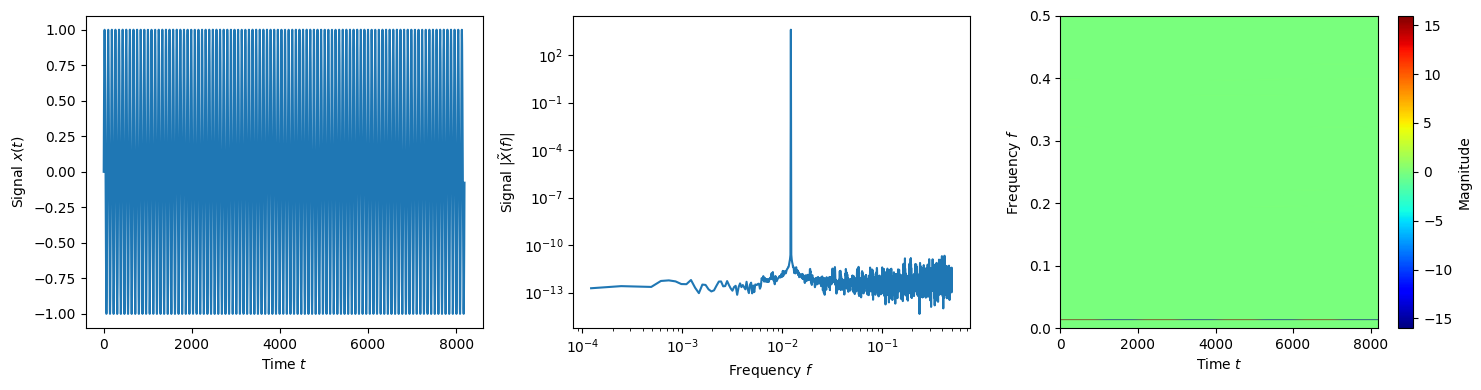

In [ ]:
f = lambda t, T: np.sin(2*np.pi*t/T)

data = f(wdm.times, N/100)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')

plt.tight_layout()
plt.show()

Gaussian pulse

$$ x(t) = \exp\left(\frac{-(t-t_c)^2}{2w^2}\right) $$

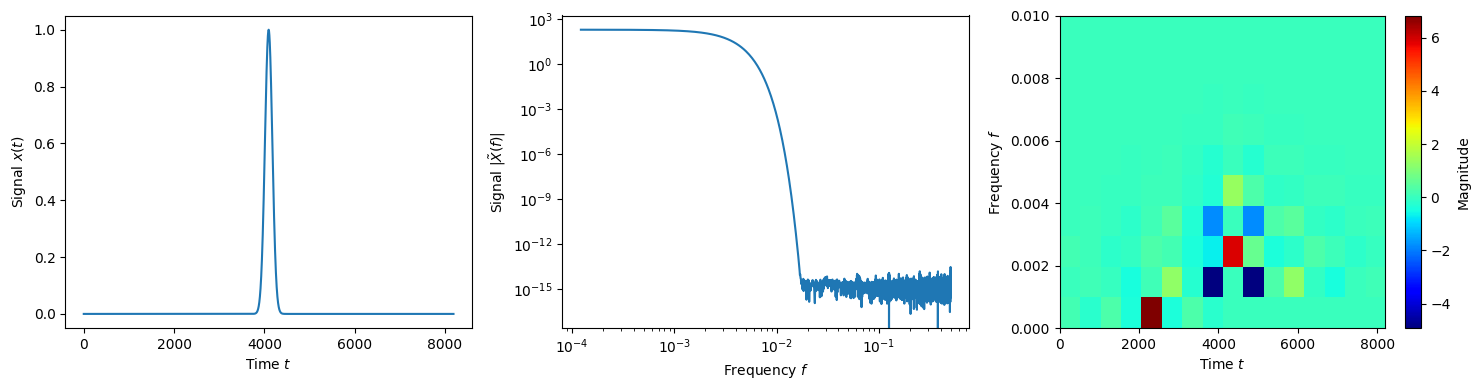

In [6]:
f = lambda t: np.exp(-0.5*((t-N/2)/(N/100))**2)

data = f(wdm.times)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')
axes[2].set_ylim(0, 0.01)

plt.tight_layout()
plt.show()

Top hat pulse

$$ x(t) = \Theta\left(t-t_c+\frac{w}{2}\right) - \Theta\left(t-t_c-\frac{w}{2}\right) $$

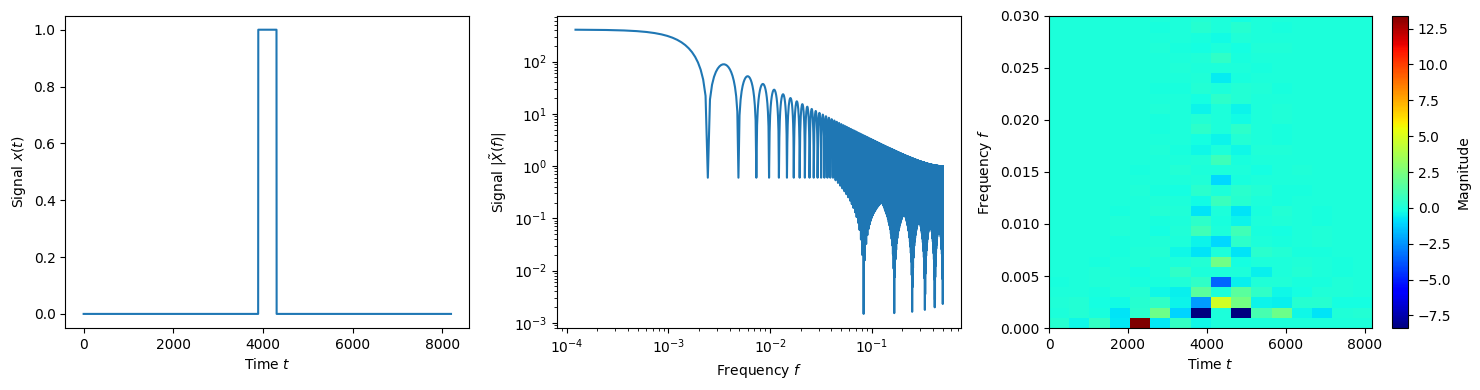

In [7]:
f = lambda t: np.heaviside(t-N/2+N/40, 1) - np.heaviside(t-N/2-N/40, 1)

data = f(wdm.times)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')
axes[2].set_ylim(0, 0.03)

plt.tight_layout()
plt.show()

Narrow top hat pulse

$$ x(t) = \Theta\left(t-t_c+\frac{w}{2}\right) - \Theta\left(t-t_c-\frac{w}{2}\right) $$

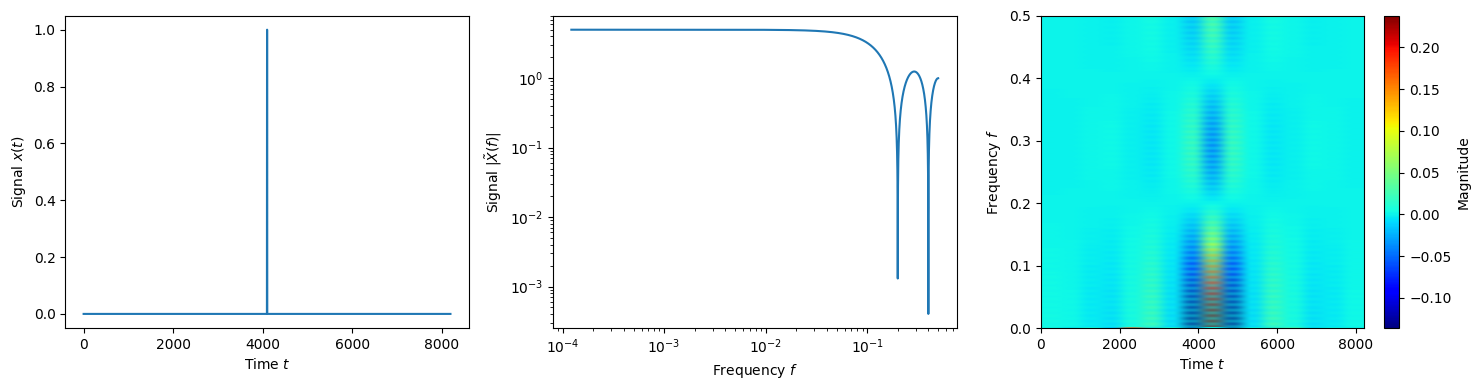

In [8]:
f = lambda t: np.heaviside(t-N/2+N/4000, 1) - np.heaviside(t-N/2-N/4000, 1)

data = f(wdm.times)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')

plt.tight_layout()
plt.show()

Gaussian white noise 

$$ x[k] \equiv x(t_k) \sim \mathcal{N}(0,1) $$

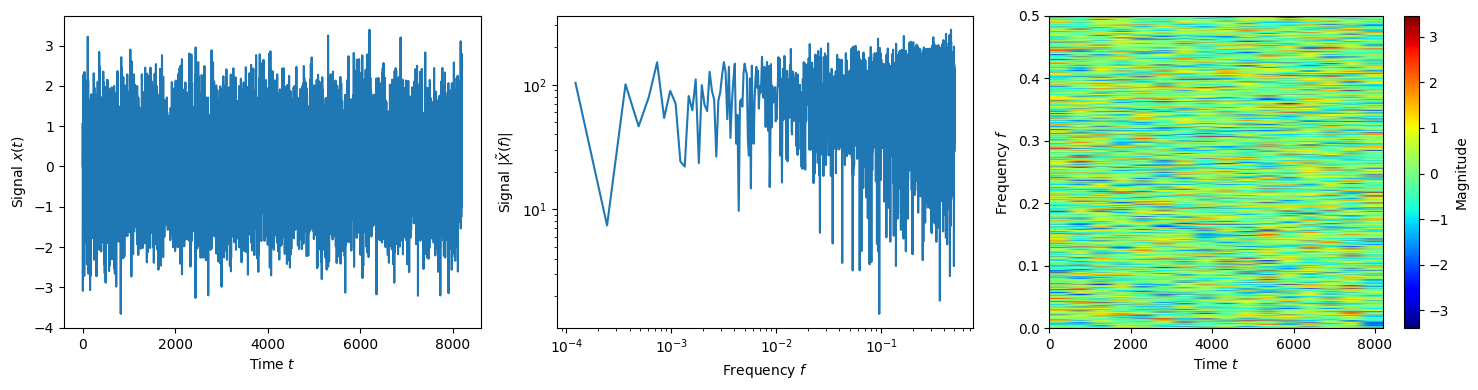

In [22]:
data = np.random.normal(size=len(wdm.times))

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')

plt.tight_layout()
plt.show()

Locally Stationary Wavelet White Noise Process. This is defined by having the wavelet coefficients satisfy

$$ w_{nm} \sim \mathcal{N}(0,1) $$

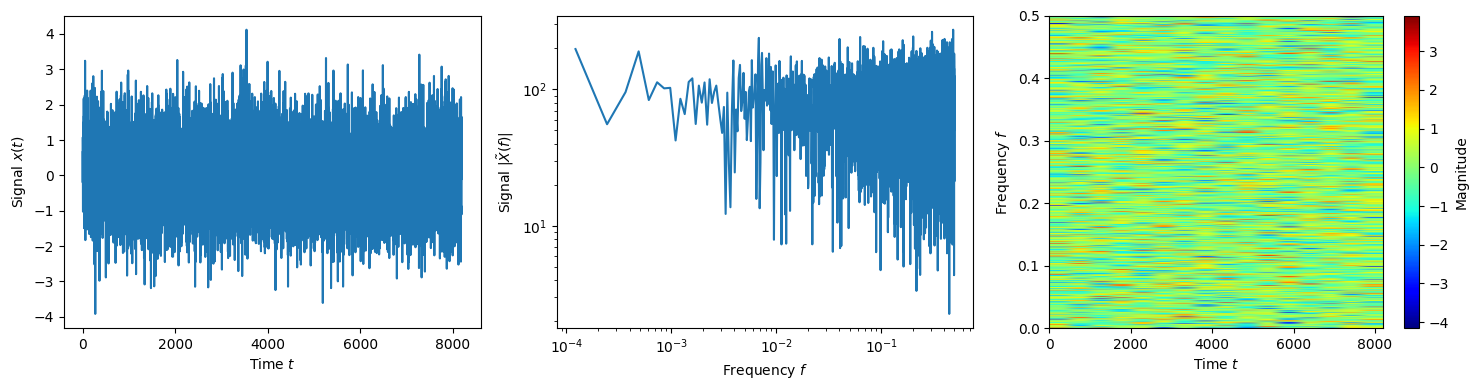

In [23]:
w = np.random.normal(size=(wdm.Nt, wdm.Nf))

data = wdm.idwt(w)

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

fig, axes[0] = time_domain_plot(wdm, data, figax=(fig, axes[0]))

fig, axes[1] = frequency_domain_plot(wdm, data, figax=(fig, axes[1]))

fig, axes[2] = time_frequency_plot(wdm, wdm(data), figax=(fig, axes[2]), part='real')

plt.tight_layout()
plt.show()